Cluster labels for first 10 customers:
 [2 1 2 2 0 1 0 1 1 1]
Mean Squared Error: 532807478.07859755


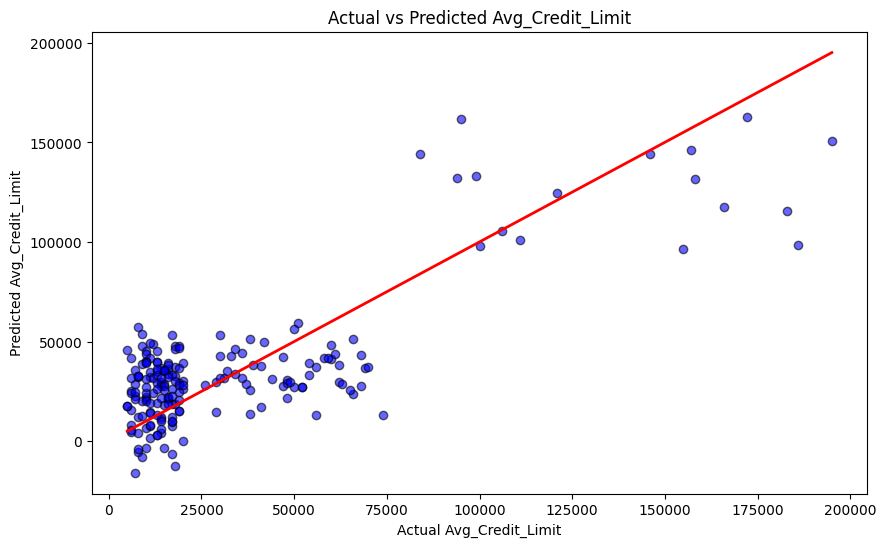

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the customer profiling dataset
customer_df = pd.read_csv('Credit Card Customer Data.csv')

# Select relevant features and normalize them
features = customer_df.drop(columns=['Sl_No', 'Customer Key'])
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# K-means clustering (without using scikit-learn)
def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    return np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k, iterations=100):
    centroids = initialize_centroids(X, k)
    for _ in range(iterations):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Example: Use 3 clusters
k = 3
centroids, labels = k_means(normalized_features, k)

# Print cluster labels for the first 10 customers
print("Cluster labels for first 10 customers:\n", labels[:10])

# Build a linear regression model to predict the 'Avg_Credit_Limit'
X = customer_df.drop(columns=['Sl_No', 'Customer Key', 'Avg_Credit_Limit'])
y = customer_df['Avg_Credit_Limit']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

# Visualize the prediction results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', lw=2)
plt.xlabel('Actual Avg_Credit_Limit')
plt.ylabel('Predicted Avg_Credit_Limit')
plt.title('Actual vs Predicted Avg_Credit_Limit')
plt.show()
